Convergence achieved after 331 iterations


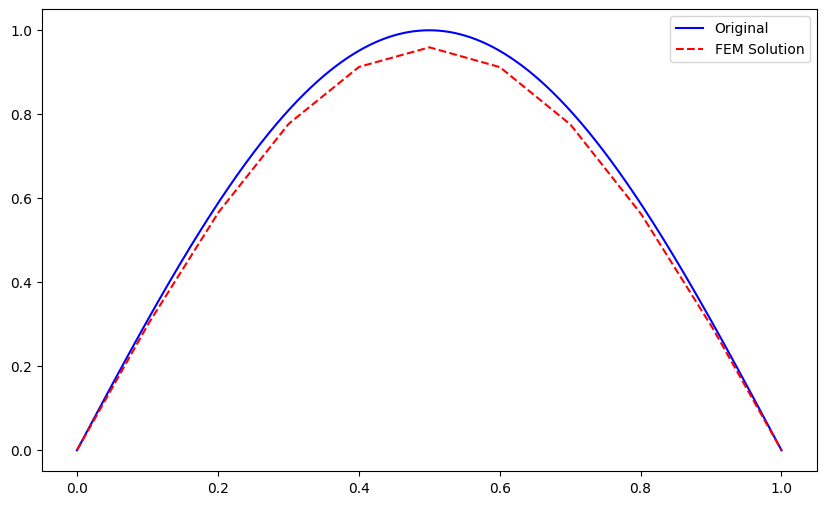

In [ ]:
from math import * # Use a non-interactive backend for saving plots
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def Gauss_Seidel(A,b,x_0,n,TOL):
    sum1 = sum2 = 0
    x = [0]*n
    c = 0
    while True:
        
        #x = [0]*n
        for i in range(0,n):
            sum1 = sum2 = 0
            for j in range(0,i):
                sum1 = sum1 + A[i][j]*x[j]
            for j in range(i+1,n):
                sum2 = sum2 + A[i][j]*x_0[j]
            x[i] = (b[i] - sum1 - sum2)/A[i][i]
        if (c+1) % 100 == 0:
            #print("Iteration",c+1,":",x)
            pass
        #time.sleep(0.01)
        # print("Checking the convergence criteria")
        # print(max([abs(x[i]-x_0[i]) for i in range(0,n)]),max([abs(x[i]) for i in range(n)]))
        if max([abs(x[i]-x_0[i]) for i in range(0,n)])/max([abs(x[i]) for i in range(n)]) < TOL:
            # print("Checking the convergence criteria")
            # print(max([abs(x[i]-x_0[i]) for i in range(0,n)]),max([abs(x[i]) for i in range(n)]))
            # print(max([abs(x[i]-x_0[i]) for i in range(0,n)])/max([abs(x[i]) for i in range(n)]))
            print("Convergence achieved after", c+1, "iterations")
            return x
        
        x_0 = x.copy()
        c = c + 1

def trapezoidal(a,b,f):
    return (b-a)*(f(a)+f(b))/2
def simpsons(a,b,f):
    return (b-a)*(f(a)+f(b)+4*f((a+b)/2))/6

def comp_simpsons(a,b,n,f):
    x_val = []
    for i in range(n+1):
        x_val.append(a+i*(b-a)/n)
    integral = 0
    for i in range(n):
        integral += simpsons(x_val[i],x_val[i+1],f)
    return integral

def phi(x,x_list,i):
    if x_list[i-1] <= x <= x_list[i] :
        return (x - x_list[i-1])/(x_list[i] - x_list[i-1])
    elif x_list[i] < x <= x_list[i+1] :
        return (x_list[i+1] - x)/(x_list[i+1] - x_list[i])
    else :
        return 0
    
def der_phi(x,x_list,i):
    if x_list[i-1] <= x <= x_list[i] :
        return 1/(x_list[i] - x_list[i-1])
    elif x_list[i] < x <= x_list[i+1] :
        return -1/(x_list[i+1] - x_list[i])
    else :
        return 0

def inner_product(a,b,f,g,der_f,der_g,k):
    func = lambda x : f(x)*g(x)*k(x) + der_f(x)*der_g(x)
    return comp_simpsons(a, b,100000,func)

def L(f,g,a,b):
    func = lambda x : f(x)*g(x)
    return comp_simpsons(a, b,100000, func)

def FEM_first_order(a, b, n, f, k):
    partition = [(a + i*(b-a)/n) for i in range(n+1)]
    
    A = [[0 for _ in range(n-1)] for _ in range(n-1)]
    b_vector = [0 for _ in range(n-1)]
    
    for i in range(n-1):
        for j in range(n-1):
                A[i][j] = inner_product(a, b, 
                                        lambda x: phi(x, partition, i+1), 
                                        lambda x: phi(x, partition, j+1), 
                                        lambda x: der_phi(x, partition, i+1),
                                        lambda x: der_phi(x, partition, j+1),
                                        k)
        b_vector[i] = L(lambda x: phi(x, partition, i+1), f, a, b)
    x_0 = [0] * (n-1)
    TOL = 1e-20
    alphas = Gauss_Seidel(A, b_vector, x_0, n-1, TOL)
    result = lambda x : sum(alphas[i] * phi(x, partition, i+1) for i in range(n-1))
    return result

def plot(f,k,a,b,n,sol):
   
    x_values = np.linspace(a, b, 100000)
    y_values = [sol(x) for x in x_values]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label='Original', color='blue')
    
    function = FEM_first_order(a, b, n, f, k)
    y_sol_values = [function(x) for x in x_values]
    plt.plot(x_values, y_sol_values, label='FEM Solution', color='red', linestyle='--')
    plt.legend()
    plt.show()

def f1(x):
    return pi**2 * sin(pi * x)
def sol1(x):
    return sin(pi * x)

plot(f1, lambda x: 0, 0, 1, 10,sol1)
                

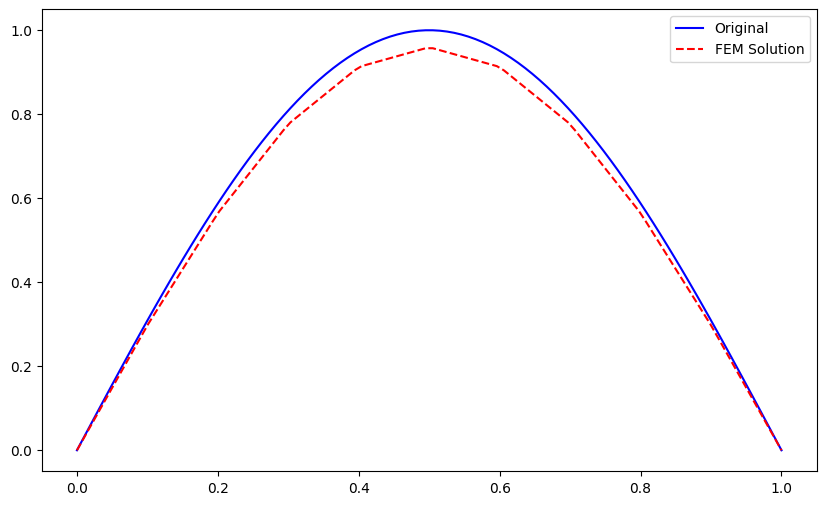

In [9]:
def Gauss_Backward(A,n):
    for i in range(0,n-1):
        for p in range(i,n):
            if A[p][i] != 0:
                A[p],A[i] = A[i],A[p]
                break
        # if p != i:
           
        else :
            #print('problem here')
            return "No unique solution"
        for j in range(i+1,n):
            m_ji = A[j][i]/A[i][i]
            for k in range(0,n+1):
                A[j][k] = A[j][k] - m_ji*A[i][k]
    if A[n-1][n-1] == 0:
        #print('problem here 1')
        return "No unique solution"
    x = [0]*n
    x[n-1] = A[n-1][n]/A[n-1][n-1]
    for i in range(n-2,-1,-1):
        sum = 0
        for j in range(i+1,n):
            sum = sum + A[i][j]*x[j]
        x[i] = (A[i][n] - sum)/A[i][i]
    return x





def FEM_using_Backward(a, b, n, f, k):
    partition = [(a + i*(b-a)/n) for i in range(n+1)]
    
    A = [[0 for _ in range(n-1)] for _ in range(n-1)]
    b_vector = [0 for _ in range(n-1)]
    
    for i in range(n-1):
        for j in range(n-1):
                A[i][j] = inner_product(a, b, 
                                        lambda x: phi(x, partition, i+1), 
                                        lambda x: phi(x, partition, j+1), 
                                        lambda x: der_phi(x, partition, i+1),
                                        lambda x: der_phi(x, partition, j+1),
                                        k)
        b_vector[i] = L(lambda x: phi(x, partition, i+1), f, a, b)
    
    new_A = [row + [b_vector[i]] for i, row in enumerate(A)]

    alphas = Gauss_Backward(new_A, n-1)
    if isinstance(alphas, str):
        return alphas  # Return the error message if no unique solution exists
    result = lambda x : sum(alphas[i] * phi(x, partition, i+1) for i in range(n-1))
    return result

def plot_backward(f,k,a,b,n,sol):
    x_values = np.linspace(a, b, 100)
    y_values = [sol(x) for x in x_values]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label='Original', color='blue')
    
    function = FEM_using_Backward(a, b, n, f, k)
    if isinstance(function, str):
        print(function)  # Print the error message if no unique solution exists
        return
    y_sol_values = [function(x) for x in x_values]
    plt.plot(x_values, y_sol_values, label='FEM Solution', color='red', linestyle='--')
    plt.legend()
    plt.show()
    
plot_backward(f1, lambda x: 0, 0, 1, 10, sol1)

Convergence achieved after 331 iterations


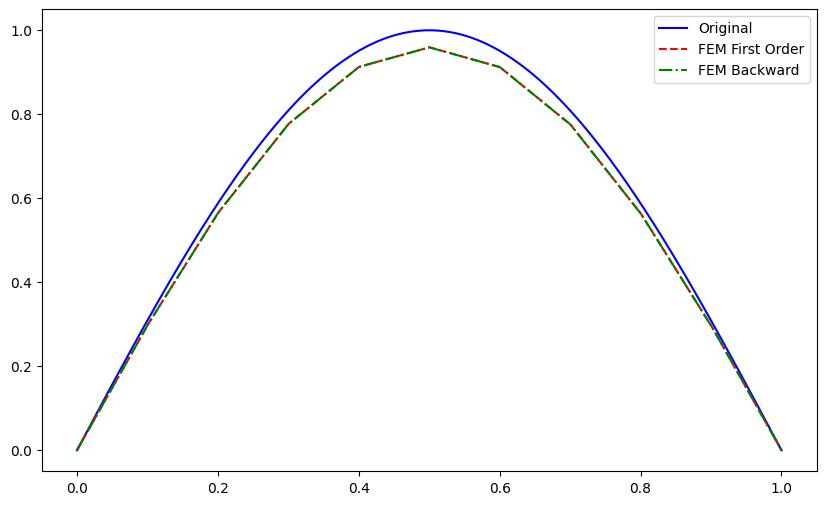

In [20]:
# want to plot both in same figure

def plot_both(f, k, a, b, n, sol):
    x_values = np.linspace(a, b, 10000)
    y_values = [sol(x) for x in x_values]
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label='Original', color='blue')
    
    function_fem = FEM_first_order(a, b, n, f, k)
    y_sol_values_fem = [function_fem(x) for x in x_values]
    plt.plot(x_values, y_sol_values_fem, label='FEM First Order', color='red', linestyle='--')
    
    function_backward = FEM_using_Backward(a, b, n, f, k)
    if isinstance(function_backward, str):
        print(function_backward)  # Print the error message if no unique solution exists
        return
    y_sol_values_backward = [function_backward(x) for x in x_values]
    plt.plot(x_values, y_sol_values_backward, label='FEM Backward', color='green', linestyle='-.')
    
    plt.legend()
    plt.show()

plot_both(f1, lambda x: 0, 0, 1, 10, sol1)